In [4]:
##Reference link https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f
#Part 1: https://medium.com/python-data/effient-frontier-in-python-34b0c3043314
#Part 2: https://medium.com/python-data/efficient-frontier-portfolio-optimization-with-python-part-2-2-2fe23413ad94

# import needed modules
#import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
#quandl.ApiConfig.api_key = 'pVwMQzrdgTLsEnKzeggr'
#selected = ['KO', 'F', 'WMT', 'GE', 'TSLA','GS','AAPL', 'COST','JNJ'] ##['CNP', 'F', 'WMT', 'GE', 'TSLA']
#data = quandl.get_table('WIKI/PRICES', ticker = selected,
#                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
#                        date = { 'gte': '2014-1-1', 'lte': '2018-12-31' }, paginate=True)
#
#data[data['ticker'] =='F' ].head(5) # 2017-12-31

In [ ]:
import os
'''
# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker') #.reset_index().rename_axis(None,1)

# Assign the pivot table to a dataframe and fix the column lable, then write to csv file
stk_data = pd.DataFrame(table.to_records())
## Run on Surface Tablet: change the headers of columns
stk_data.columns = [hdr.replace("('adj_close', '", "").replace("')", "") \

                    for hdr in stk_data.columns]
## Run on MacBook: change the headers of columns: ios unicode
#stk_data.columns = [hdr.replace("(u'adj_close', u'", "").replace("')", "") \
#                    for hdr in stk_data.columns ]

#print(stk_data.columns)

#for ticker in selected:
#    stk_data[ticker] = table[ticker]

#stk_data.head()
cur_path = os.getcwd()

#data_file = cur_path+'\stk_price.csv' ## Windows path
data_file = cur_path+'/stk_price.csv' ## OS path
#print(data_file)

## Save stock prices to data file
stk_data.to_csv(data_file, index=False)

'''

## Read data from a data file
cur_path = os.getcwd()
data_file = cur_path+'/stk_price.csv' ## OS path
stk_prices = pd.read_csv(data_file).set_index('date')
#print(stk_prices[:5]['AAPL'])

# calculate daily and annual returns of the stocks
stk_returns = stk_prices.pct_change()
test_start = '2014-01-01'
test_end = '2016-11-31'
#range_idx = (stk_returns['date'] > test_start) & (stk_returns['date'] <= test_end)

#returns_daily = table.pct_change()
returns_daily = stk_returns.loc[test_start:test_end]
#returns_daily = stk_prices[range_idx].pct_change()

returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

#print(table[:8])
#print(stk_returns.loc[:'2014-01-10'])
print(cov_annual)
print('Daily return calculation example using the first 2 prices of Ford: ')
# print((table.iloc[1][0]-table.iloc[0][0])/table.iloc[0][0])


          AAPL      COST         F        GE        GS       JNJ        KO  \
AAPL  0.058306  0.013473  0.018997  0.016518  0.021729  0.012548  0.009394   
COST  0.013473  0.027807  0.013727  0.011496  0.013754  0.009835  0.009937   
F     0.018997  0.013727  0.052354  0.021483  0.029489  0.013149  0.009508   
GE    0.016518  0.011496  0.021483  0.034080  0.023919  0.013938  0.010224   
GS    0.021729  0.013754  0.029489  0.023919  0.050415  0.015445  0.010311   
JNJ   0.012548  0.009835  0.013149  0.013938  0.015445  0.022069  0.009206   
KO    0.009394  0.009937  0.009508  0.010224  0.010311  0.009206  0.020921   
TSLA  0.026148  0.013623  0.029841  0.022836  0.027284  0.014469  0.011386   
WMT   0.011025  0.014813  0.011787  0.010847  0.010367  0.010147  0.009327   

          TSLA       WMT  
AAPL  0.026148  0.011025  
COST  0.013623  0.014813  
F     0.029841  0.011787  
GE    0.022836  0.010847  
GS    0.027284  0.010367  
JNJ   0.014469  0.010147  
KO    0.011386  0.009327  
TSL

/var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/ipykernel_66807/13334851.py:42: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stk_returns = stk_prices.pct_change()


NameError: name 'table' is not defined

In [6]:
returns_daily

,AAPL,COST,F,GE,GS,JNJ,KO,TSLA,WMT
date,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.021966,-0.004414,0.004534,-0.000727,0.007123,0.009008,-0.004919,-0.003598,-0.003295
2014-01-06,0.005453,-0.007588,0.004513,-0.008006,0.006848,0.005226,-0.004696,-0.017117,-0.005594
2014-01-07,-0.007156,-0.004639,-0.012837,0.001101,-0.006021,0.021228,0.002980,0.016054,0.003069
2014-01-08,0.006338,-0.015622,0.010403,-0.002931,0.000841,-0.001379,-0.011141,0.012855,-0.007903
...,...,...,...,...,...,...,...,...,...
2016-11-23,-0.005098,-0.007009,0.000841,0.005131,0.005684,0.002927,-0.006043,0.010305,0.010125
2016-11-25,0.005035,0.001847,0.011765,0.003191,-0.004380,0.009375,0.009971,0.018173,0.005647
2016-11-28,-0.001968,-0.004148,-0.009967,-0.006043,-0.004873,-0.008762,0.005297,-0.002695,-0.000562


Equal weight port return: 0.09, volatility: 0.14, Sharpe ratio: 0.63.


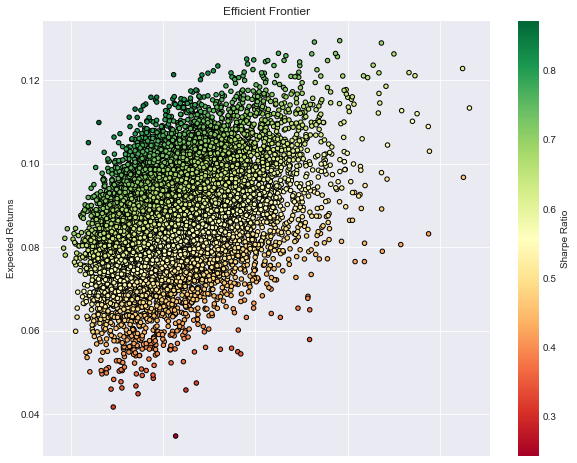

In [ ]:
def port_mv(weight, rtn_vec, cov_mtrx):
    rtn = np.dot(weight, rtn_vec)
    vol = np.sqrt(np.dot(weight.T, np.dot(cov_mtrx, weight)))
    sharpe = rtn / vol
    return rtn, vol, sharpe

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

# set the number of combinations for imaginary portfolios
#stk_set = ['KO', 'F', 'WMT', 'GE', 'TSLA','GS', 'AAPL']
stk_set = selected  #['KO', 'F', 'WMT', 'GE', 'TSLA','GS', 'AAPL']
num_assets = len(stk_set)
num_portfolios = 10000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

eq_wgt = np.ones(num_assets)/float(num_assets)
eq_rtn, eq_vol, eq_sharpe = port_mv(eq_wgt, returns_annual, cov_annual)
print('Equal weight port return: %4.2f, volatility: %4.2f, Sharpe ratio: %4.2f.' % (eq_rtn, eq_vol, eq_sharpe))
sharpe_ratio.append(eq_sharpe)
port_returns.append(eq_rtn)
port_volatility.append(eq_vol)
stock_weights.append(eq_wgt)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stk_set):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in stk_set]

# reorder dataframe columns
df = df[column_order]
df.head()

# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
eq_weight_port = df.iloc[-1]

# Regular plot the efficient frontier with a scatter plot
#plt.style.use('seaborn')
#df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)

### Heat map plot of portfolios
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

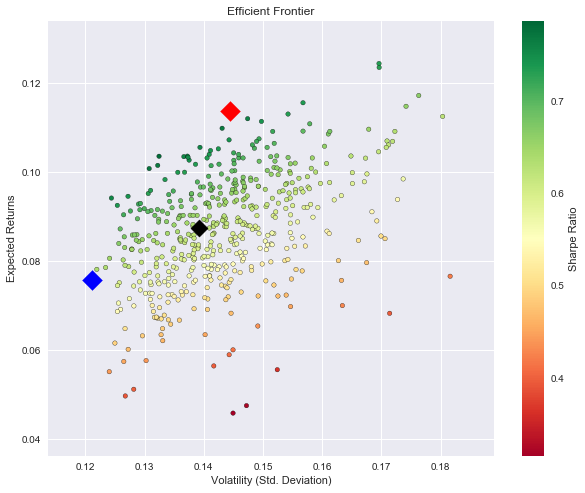

                    74
Returns       0.075756
Volatility    0.121067
Sharpe Ratio  0.625739
KO weight     0.076068
F weight      0.179135
WMT weight    0.079656
GE weight     0.057294
TSLA weight   0.073255
GS weight     0.163735
AAPL weight   0.208181
COST weight   0.020371
JNJ weight    0.142305
                    47
Returns       0.113625
Volatility    0.144428
Sharpe Ratio  0.786722
KO weight     0.223806
F weight      0.108669
WMT weight    0.081895
GE weight     0.119223
TSLA weight   0.123746
GS weight     0.265199
AAPL weight   0.004530
COST weight   0.071539
JNJ weight    0.001392
Equal weight portfolio:
Returns         0.087480
Volatility      0.139114
Sharpe Ratio    0.628839
KO weight       0.111111
F weight        0.111111
WMT weight      0.111111
GE weight       0.111111
TSLA weight     0.111111
GS weight       0.111111
AAPL weight     0.111111
COST weight     0.111111
JNJ weight      0.111111
Name: 500, dtype: float64


In [ ]:
# print the details of the 2 special portfolios
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.scatter(x=eq_weight_port['Volatility'], y=eq_weight_port['Returns'], c='black', marker='D', s=150 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

print(min_variance_port.T)
print(sharpe_portfolio.T)
print('Equal weight portfolio:')
print(eq_weight_port.T)

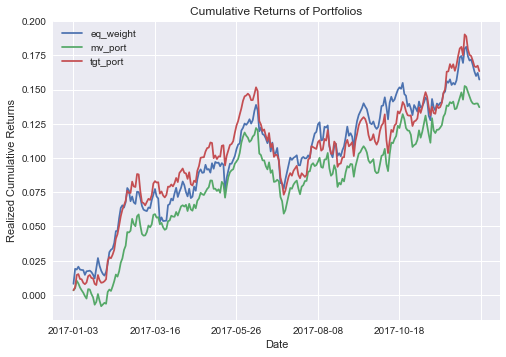

In [ ]:
#Plot the portfolio returns over time
df_daily_rtns = pd.DataFrame(returns_daily).dropna()
out_sample_start = '2017-01-01'
out_sample_end = '2017-12-31'
df_daily_rtns = stk_returns.loc[out_sample_start:out_sample_end].dropna()

df_port_rtns = np.dot(df_daily_rtns, eq_weight_port[3:].T)
df_cumrtn = pd.DataFrame(df_port_rtns,index=df_daily_rtns.index, columns=['eq_weight']).cumsum()

port_vec = np.array(min_variance_port)
# The 3rd entry to the last entry are the portfolio weights
df_minvar_rtn = np.dot(df_daily_rtns, port_vec.T[3:])
df_cumrtn['mv_port'] = df_minvar_rtn.cumsum()

port_vec = np.array(sharpe_portfolio)
# The 3rd entry to the last entry are the portfolio weights
df_tgt_rtn = np.dot(df_daily_rtns, port_vec.T[3:])
df_cumrtn['tgt_port'] = df_tgt_rtn.cumsum()


#print(df_cumrtn.iloc[:5])

# Regular plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df_cumrtn.plot()
plt.xlabel('Date')
plt.ylabel('Realized Cumulative Returns')
plt.title('Cumulative Returns of Portfolios')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers

# Turn off progress printing 
solvers.options['show_progress'] = False

def optimal_portfolio(returns):
    #n = len(returns)
    # Turn returns into a matrix which has its rows corresponding to daily returns of stocks
    returns = np.asmatrix(returns).T
    n = returns.shape[0] # n is the number of assents in returns
    
    ## Choose N different values for the Lagrange multiplier
    N = 100
    lambdas = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    
    #pbar = opt.matrix(np.mean(returns, axis=1))
    ## Calculate the mean returns of all stocks: returns of each stock is given in a column
    pbar = opt.matrix(np.mean(returns, axis=1))
    #print(np.asmatrix(pbar).shape)
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # ensure positive weights
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(lbda*S, -pbar, G, h, A, b)['x'] 
                  for lbda in lambdas]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    factor_annualize = 252 # make the rtns and risk into annualized quantities
    rtns = [factor_annualize*blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(factor_annualize*blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(rtns, risks, 2)
    print('m1 dimensions: ', np.shape(m1))
    x1 = np.sqrt(m1[2] / m1[0])
    print('x1 is: ', x1)
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), rtns, risks

m1 dimensions:  (3,)
x1 is:  0.11594299318278828
The portfolio of stocks are:  ['AAPL' 'COST' 'F' 'GE' 'GS' 'JNJ' 'KO' 'TSLA' 'WMT']
The optimal portfolio is:  [[6.19439724e-01 7.38907327e-07 9.16861245e-08 2.71224002e-07
  5.50544855e-07 4.91729134e-07 1.41060821e-07 3.80557887e-01
  1.03083387e-07]]


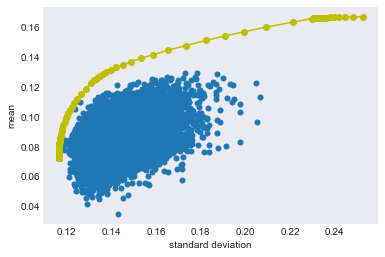

In [ ]:
## Set the matrix of daily returns of all stocks
return_vec = returns_daily.dropna()
weights, returns, risks = optimal_portfolio(return_vec)
means = portfolio['Returns']
stds = portfolio['Volatility']

fig = plt.figure()

plt.plot(stds, means, 'o', markersize=5)
plt.plot(risks, returns, 'y-o')
plt.ylabel('mean')
plt.xlabel('standard deviation')

print('The portfolio of stocks are: ', stk_returns.columns.values)
print('The optimal portfolio is: ', weights.T)
#py.iplot_mpl(fig, filename='efficient_frontier', strip_style=True)

In [ ]:
return_vec = returns_daily.dropna()
print(return_vec.iloc[:5,])
print(return_vec.shape[1])
print("length of return_vect is: ", len(return_vec))
tmp_rtn = np.asmatrix(return_vec.T)
#print(opt.matrix(np.cov(tmp_rtn)))
print('rtn vector dim is: ', tmp_rtn.shape)
print('Cov matrix dim is: ', np.cov(tmp_rtn).shape)

tmp_mean = np.mean(tmp_rtn, axis=0)
print('Mean returns are: ', tmp_mean)
print('tmp_mean length is: ', len(tmp_mean))

means = portfolio['Returns']
stds = portfolio['Volatility']
print(len(means))
print(len(stds))